In [1]:
from qiskit import *
from numpy import pi
import random

In [2]:
class adv_QuantumCircuit(QuantumCircuit):
    def adv_cx(self, case, q1, q2):
        if case==1:
            self.cx(q1, q2)
        elif case==2:
            self.x(q2)
            self.cx(q1, q2)
            self.x(q2)
        elif case==3:
            self.y(q2)
            self.cx(q1, q2)
            self.z(q1)
            self.y(q2)
        elif case==4:
            self.z(q2)
            self.cx(q1, q2)
            self.z(q1)
            self.z(q2)
        elif case==5:
            self.y(q1)
            self.cx(q1, q2)
            self.y(q1)
            self.x(q2)
        elif case==6:
            self.y(q1)
            self.x(q2)
            self.cx(q1, q2)
            self.y(q1)
        elif case==7:
            self.y(q1)
            self.y(q2)
            self.cx(q1, q2)
            self.x(q1)
            self.z(q2)
        elif case==8:
            self.y(q1)
            self.z(q2)
            self.cx(q1, q2)
            self.x(q1)
            self.y(q2)
        elif case==9:
            self.x(q1)
            self.cx(q1, q2)
            self.x(q1)
            self.x(q2)
        elif case==10:
            self.x(q1)
            self.x(q2)
            self.cx(q1, q2)
            self.x(q1)
        elif case==11:
            self.x(q1)
            self.y(q2)
            self.cx(q1, q2)
            self.y(q1)
            self.z(q2)
        elif case==12:
            self.x(q1)
            self.z(q2)
            self.cx(q1, q2)
            self.y(q1)
            self.y(q2)
        elif case==13:
            self.z(q1)
            self.cx(q1, q2)
            self.z(q1)
        elif case==14:
            self.z(q1)
            self.x(q2)
            self.cx(q1, q2)
            self.z(q1)
            self.x(q2)
        elif case==15:
            self.z(q1)
            self.y(q2)
            self.cx(q1, q2)
            self.y(q2)
        elif case==16:
            self.z(q1)
            self.z(q2)
            self.cx(q1, q2)
            self.z(q2)

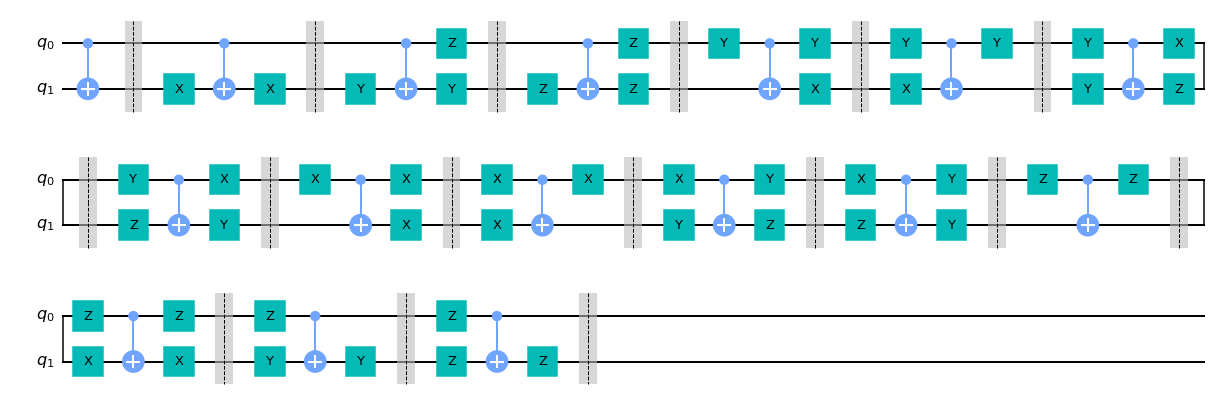

In [3]:
# check cnot gate
circ = adv_QuantumCircuit(2)
for k in range(1,17):
    circ.adv_cx(k,0,1)
    circ.barrier()
circ.draw("mpl")

In [4]:
circuit = adv_QuantumCircuit(6)

num=6


rot0 = random.random()*2*pi
rot1 = random.random()*2*pi
rot2 = random.random()*2*pi
rot3 = random.random()*2*pi
rot4 = random.random()*2*pi
rot5 = random.random()*2*pi


circuit.rx(rot0, 0)
circuit.rx(rot1, 1)
circuit.rx(rot2, 2)
circuit.rx(rot3, 3)
circuit.rx(rot4, 4)
circuit.rx(rot5, 5)
circuit.barrier()

circuit.adv_cx(num, 1, 2)
circuit.adv_cx(num, 3, 4)
circuit.adv_cx(num, 1, 2)
circuit.adv_cx(num, 3, 4)
circuit.adv_cx(num, 0, 1)
circuit.adv_cx(num, 2, 3)
circuit.adv_cx(num, 4, 5)
circuit.adv_cx(num, 0, 1)
circuit.adv_cx(num, 2, 3)
circuit.adv_cx(num, 4, 5)
circuit.adv_cx(num, 1, 2)
circuit.adv_cx(num, 3, 4)
circuit.adv_cx(num, 1, 2)
circuit.adv_cx(num, 3, 4)
circuit.barrier()

circuit.rx(-rot0,0)
circuit.rx(-rot1, 1)
circuit.rx(-rot2, 2)
circuit.rx(-rot3, 3)
circuit.rx(-rot4, 4)
circuit.rx(-rot5, 5)


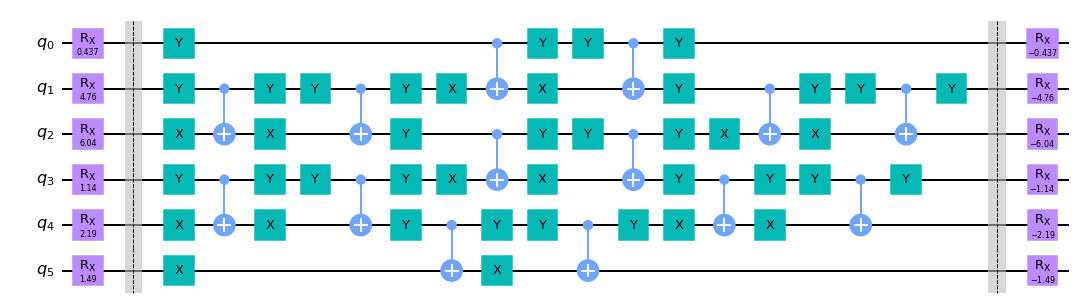

In [5]:
circuit.draw("mpl")

In [6]:
def make_circuit(num,i):
    circuit = adv_QuantumCircuit(6,6)
    
    rot0 = random.random()*2*pi
    rot1 = random.random()*2*pi
    rot2 = random.random()*2*pi
    rot3 = random.random()*2*pi
    rot4 = random.random()*2*pi
    rot5 = random.random()*2*pi
    
    circuit.rx(rot0, 0)
    circuit.rx(rot1, 1)
    circuit.rx(rot2, 2)
    circuit.rx(rot3, 3)
    circuit.rx(rot4, 4)
    circuit.rx(rot5, 5)

    circuit.barrier()

    for k in range(i):

        circuit.adv_cx(num,1, 2)
        circuit.adv_cx(num,3, 4)
        circuit.barrier(5)
        circuit.barrier(0)
        
        circuit.barrier(5)
        circuit.barrier(0)
        circuit.adv_cx(num,1, 2)
        circuit.adv_cx(num,3, 4)
        circuit.barrier(5)
        circuit.adv_cx(num,0, 1)
        circuit.adv_cx(num,2, 3)
        circuit.adv_cx(num,4, 5)
        
        circuit.adv_cx(num,0, 1)
        circuit.adv_cx(num,2, 3)
        circuit.adv_cx(num,4, 5)
        circuit.barrier(0)
        circuit.adv_cx(num,1, 2)
        circuit.adv_cx(num,3, 4)
        circuit.barrier(5)
        circuit.barrier(0)
        circuit.barrier(5)
        circuit.barrier(0)
        circuit.adv_cx(num,1, 2)
        circuit.adv_cx(num,3, 4)
        circuit.barrier()

    circuit.rx(-rot0,0)
    circuit.rx(-rot1, 1)
    circuit.rx(-rot2, 2)
    circuit.rx(-rot3, 3)
    circuit.rx(-rot4, 4)
    circuit.rx(-rot5, 5)
    
    circuit.measure(5,5)
    
    return circuit


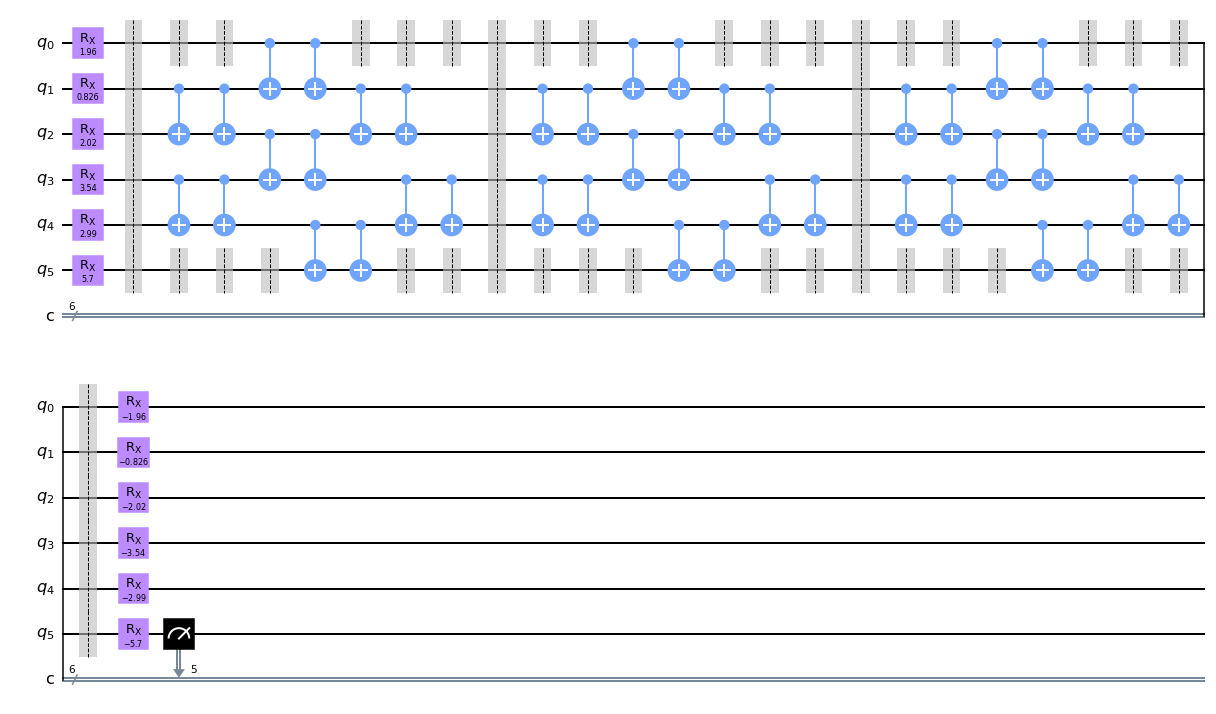

In [7]:
circuit = make_circuit(1, 3)
circuit.draw("mpl")

In [8]:
x_list = []
y_list = []
for num in range(1,17):
    x = []
    y = []
    
    for i in range(16):
        circuit = make_circuit(num,i)
        simulator = Aer.get_backend('qasm_simulator')
        shots = 5000
        result = execute(circuit, backend= simulator, shots = shots).result()
        counts = result.get_counts()
        prob_000000 = counts['000000'] / shots
        try:
            prob_100000 = counts['100000'] / shots
        except:
            prob_100000 = 0
        #print(prob_000000)
        prob_tot = prob_000000 - prob_100000

        x.append(i*0.2)
        y.append(prob_tot)
        print(counts)
    print(num)
    x_list.append(x)
    y_list.append(y)

{'000000': 5000}
{'000000': 5000}
{'000000': 5000}
{'000000': 5000}
{'000000': 5000}
{'000000': 5000}
{'000000': 5000}
{'000000': 5000}
{'000000': 5000}
{'000000': 5000}
{'000000': 5000}
{'000000': 5000}
{'000000': 5000}
{'000000': 5000}
{'000000': 5000}
{'000000': 5000}
1
{'000000': 5000}
{'000000': 5000}
{'000000': 5000}
{'000000': 5000}
{'000000': 5000}
{'000000': 5000}
{'000000': 5000}
{'000000': 5000}
{'000000': 5000}
{'000000': 5000}
{'000000': 5000}
{'000000': 5000}
{'000000': 5000}
{'000000': 5000}
{'000000': 5000}
{'000000': 5000}
2
{'000000': 5000}
{'000000': 5000}
{'000000': 5000}
{'000000': 5000}
{'000000': 5000}
{'000000': 5000}
{'000000': 5000}
{'000000': 5000}
{'000000': 5000}
{'000000': 5000}
{'000000': 5000}
{'000000': 5000}
{'000000': 5000}
{'000000': 5000}
{'000000': 5000}
{'000000': 5000}
3
{'000000': 5000}
{'000000': 5000}
{'000000': 5000}
{'000000': 5000}
{'000000': 5000}
{'000000': 5000}
{'000000': 5000}
{'000000': 5000}
{'000000': 5000}
{'000000': 5000}
{'000000

KeyboardInterrupt: 

In [ ]:
x_list = []
y_list = []
for num in range(1,17):
    x = []
    y = []
    
    for i in range(16):
        circuit = make_circuit(num,i)
        simulator = Aer.get_backend('qasm_simulator')
        shots = 5000
        result = execute(circuit, backend= simulator, shots = shots).result()
        counts = result.get_counts()
        prob_000000 = counts['000000'] / shots
        try:
            prob_100000 = counts['100000'] / shots
        except:
            prob_100000 = 0
        #print(prob_000000)
        prob_tot = prob_000000 - prob_100000

        x.append(i*0.2)
        y.append(prob_tot)
    print(num)
    x_list.append(x)
    y_list.append(y)

In [ ]:
print(y_list)